##### Here, i will be addressing the second question.
##### 2. In what ways do financial crises impact the lives of ordinary people?

In [1]:
from fredapi import Fred
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
fred_data = Fred(api_key=os.environ.get('FRED_API_KEY'))  

###### we will look at the data only for 2008 financial crisis and how it affects the public. S&P500 will the metric that represents financial crisis.

In [334]:
def to_dataframe(series_object,column_name,start_year,end_year):
    
    helper_df = pd.DataFrame(data=series_object,columns=column_name)
    helper_df['date'] = helper_df.index
    helper_df.reset_index(drop=True,inplace=True)

    helper_df['date'] = pd.to_datetime(helper_df['date'])
    helper_df['year'] = helper_df['date'].dt.year

    helper = [year for year in range(start_year,end_year+1)]
    
    df = pd.DataFrame(data=None)
    for year in helper:
        dummy_df = helper_df.loc[helper_df['year']==year].copy()
        df = pd.concat([df,dummy_df],ignore_index=True)

    return df

In [386]:
def plot_text_and_arrows(plt,df,column_name,start,end,x1,x2,y1,y2,l1=1,l2=1):

    plt.text(df['date'][start-x1],y1,'Start of the crisis',color='red')
    plt.text(df['date'][end-x2],y2,'End of the crisis',color='green')

    plt.arrow(df['date'][start],df[column_name][start],0,-l1,color='black')
    plt.arrow(df['date'][end],df[column_name][end],0,-l2,color='black')

    return plt


In [387]:
def plot_dataframe(df,column_name):
    
    plt.figure(figsize=(10,3))
    plt.plot(df['date'],df[column_name],'r')

    start = df.loc[df['date'] =='2007-12-01'].index[0]
    end = df.loc[une_df['date'] =='2009-07-01'].index[0]

    return plt, start, end

In [3]:
sp_df = fred_data.get_series('SP500')

In [13]:
#as the fredapi sp500 data is limited to the year 2012. i have imported the data file.

sp500 = pd.read_csv('data_csv.csv')
sp500.head(2)

,Date,SP500
0,1871-01-01,4.44
1,1871-02-01,4.50


In [131]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500['year'] = sp500['Date'].dt.year

sp500_df= pd.DataFrame(data=None)
helper = [2005,2006,2007,2008,2009,2010]
for year in helper:
    sp500_helper = sp500.loc[sp500['year']==(year)].copy()
    sp500_df = pd.concat([sp500_df,sp500_helper],ignore_index=True)

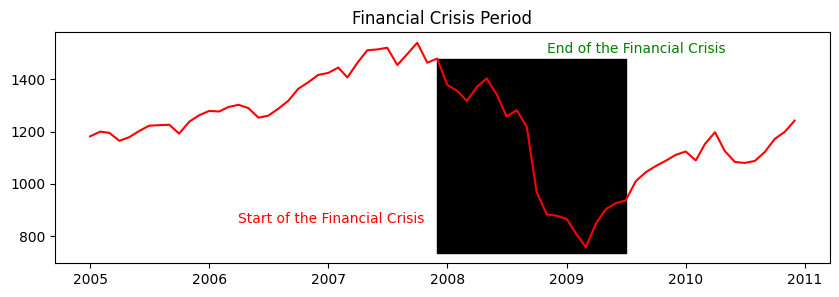

In [230]:
plt.figure(figsize=(10,3))
plt.plot(sp500_df['Date'],sp500_df['SP500'],'r')

start = sp500_df.loc[sp500_df['Date'] =='2007-12-01'].index[0]
end = sp500_df.loc[sp500_df['Date'] =='2009-07-01'].index[0]

plt.text(sp500_df['Date'][start-20],850,'Start of the Financial Crisis',fontsize=10,color='red')

plt.text(sp500_df['Date'][end-8],1500,'End of the Financial Crisis',fontsize=10,color='green')

plt.fill_between([sp500_df['Date'][start],sp500_df['Date'][end]],sp500_df['SP500'][start],
sp500_df['SP500'][end]-200, color='black')

plt.title('Financial Crisis Period')
plt.show()

In [245]:
#fetching unemployment rates

unemp = fred_data.get_series('UNRATE')

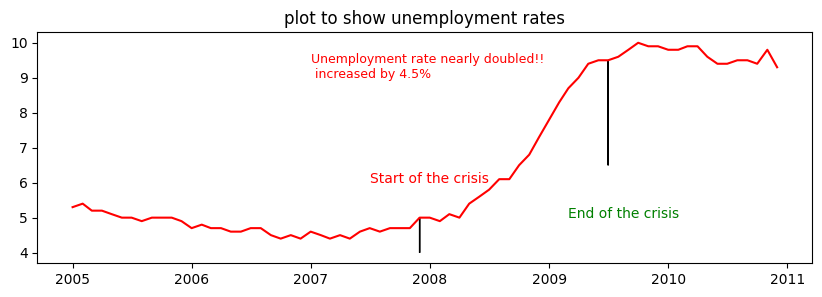

In [389]:
u_df = to_dataframe(unemp,column_name=['unrate'],start_year=2005,end_year=2010)
plt, start, end = plot_dataframe(u_df,'unrate')
plt = plot_text_and_arrows(plt,u_df,'unrate',start=start, end=end,x1=5,x2=4,y1=6,y2=5,l2=3)

pinc = u_df['unrate'][end] - u_df['unrate'][start]
plt.text(u_df['date'][start-11],9,f'Unemployment rate nearly doubled!!\n increased by {pinc}%',color='red',fontsize=9)

plt.title('plot to show unemployment rates')
plt.show()

##### The above chart shows us that people were loosing jobs due to the financial crisis. This has a huge effect on the family and also the society. as there are no jobs people might spend less and even shop owners might feel the stress.

In [311]:
#vehicle sales data

veh_sales = fred_data.get_series('TOTALSA')

In [339]:
vehdf = to_dataframe(veh_sales,['vsales'],start_year=2005,end_year=2010)

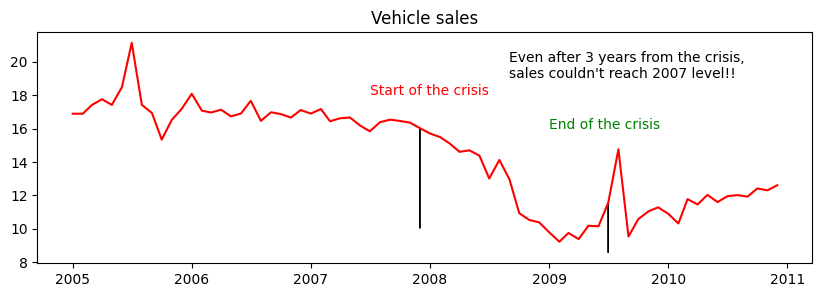

In [401]:
plt, start, end = plot_dataframe(vehdf,column_name='vsales')
plt = plot_text_and_arrows(plt,vehdf,column_name='vsales',start=start,end=end,
x1=5,x2=6,y1=18,y2=16,l1=6,l2=3)

plt.text(vehdf['date'][start+9],19,'Even after 3 years from the crisis, \nsales couldn\'t reach 2007 level!!')
plt.title('Vehicle sales')
plt.show()

In [406]:
#affect on retailers - inventory to sales

invtosales =  fred_data.get_series('RETAILIRSA')

In [408]:
inv = to_dataframe(invtosales,column_name=['isales'],start_year=2005,end_year=2010)

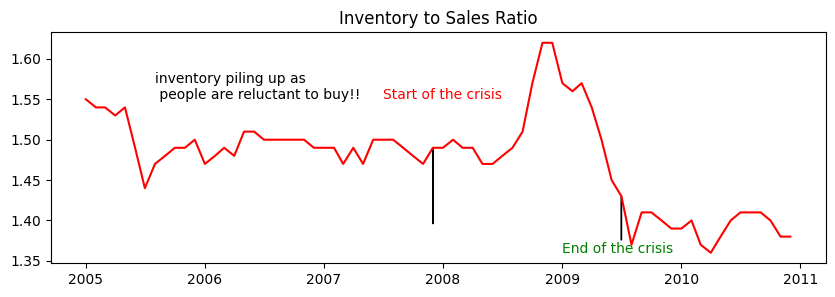

In [436]:
plt,start,end = plot_dataframe(inv,column_name='isales')
plt = plot_text_and_arrows(plt,inv,'isales',start=start,end=end,x1=5,x2=6,y1=1.55,y2=1.36,l1=.09,l2=.05)
plt.text(inv['date'][start-28],1.55,s='inventory piling up as \n people are reluctant to buy!!')
plt.title('Inventory to Sales Ratio')
plt.show()

###### The above chart is to depict the affect on retailers.